Implement modules for psc detection. Select traces for spontaneous PSC analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook


%load_ext autoreload
% autoreload

In [3]:
cd /data

/data


In [4]:
ls

Decay_tau_reci_uni.pdf                            test2016051004.mat*
E_I_age_PPR.pdf                                   test2016051005.mat*
E_I_age_decay_tau.pdf                             test2016051006.mat*
E_I_age_fail.pdf                                  test2016051501.mat*
E_I_age_onset_tau.pdf                             test2016051801.mat*
Failure_rate_reci_uni.pdf                         test2016051802.mat*
Failure_reci.pdf                                  test2016051804.mat*
Failure_uni.pdf                                   test2016051805.mat*
Figure0_3.pdf                                     test2016051806.mat*
Figure0_4.pdf                                     test2016051808.mat*
Figure0_5.pdf                                     test2016051809.mat*
Figure0_6.pdf                                     test2016052301.mat*
Figure0_7.pdf                                     test2016052302.mat*
Figure1A_1.pdf*                                   test2016052303.mat*
Figure1A_10.pdf*    

In [2]:
data= pd.read_csv('/data/Good data storage.csv')

In [6]:
data_naspm = data_napsm = data[(data['Ptl_note']=='Naspm 100 uM')]
data_naspm

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
127,2017091301,27,2,1,1,0,1,"17,18","19,20",17,0,Reduction,Naspm 100 uM
128,2017091202,26,2,1,1,0,1,6,"7,8,9",17,0,Reduction,Naspm 100 uM
129,2017092702,28,1,1,1,0,1,33,34,17,0,Reduction,Naspm 100 uM
130,2017092901,30,2,1,1,0,1,45,46,17,0,Reduction,Naspm 100 uM
131,2017102601,25,2,1,1,0,1,4,"8,9,10,11",17,0,Reduction,Naspm 100 uM
132,2017102501,24,2,1,1,0,1,"10,11,12","13,14,15,16,17,18,19",17,0,Reduction,Naspm 100 uM
133,2017102301,23,2,1,1,0,1,"17,18","19,20,22",17,0,Reduction,Naspm 100 uM


In [8]:
post_100_naspm = pd.read_pickle('/data/ana_naspm')
post_100_naspm

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
127,"{'raw_decay_tau': [nan, 0.00142818231927, 0.00...","{'raw_decay_tau': [0.00156031744059, 0.0014592...",2017091301,25,NaN,"[32, 33]"
128,"{'raw_decay_tau': [0.00121294497731, nan, 0.00...","{'raw_decay_tau': [0.000808956845364, 0.001273...",2017091202,30,NaN,"[54, 55, 56, 57, 58]"
129,"{'raw_decay_tau': [0.000723293754701, 0.000656...","{'raw_decay_tau': [0.00185466953278, 0.0016600...",2017092702,20,NaN,"[17, 24, 31]"
130,"{'raw_decay_tau': [0.00112154916799, 0.0020790...","{'raw_decay_tau': [0.00144911018822, 0.0022143...",2017092901,40,NaN,"[57, 66]"
132,"{'raw_decay_tau': [0.00308636383776, 0.0006431...","{'raw_decay_tau': [0.00104867678132, 0.0012134...",2017102501,40,NaN,"[37, 40, 41, 47, 49, 51, 52, 53, 54, 55, 56, 5..."


In [9]:
target = 130
psc_naspm_bef = pd.read_pickle('/data/psc_naspm_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_naspm_after_'+str(target))

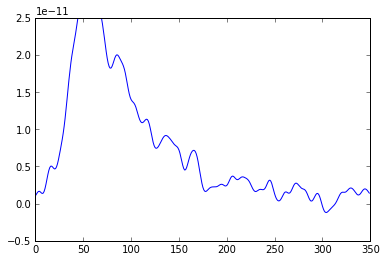

In [22]:
plt.plot(psc_naspm_bef[0][5]['trace'])

In [71]:
elimi_enter = 60
finish = (elimi_enter - 8) * 3
if elimi_enter < 40:
    start = finish - 30
    print(start, finish)
else:
    start = finish - 60
    print(start, finish)

96 156


In [67]:
spon_elimi_bef = {}
spon_elimi_aft = {}
spon_elimi_aft[36] = []   # 66 126
spon_elimi_aft[37] = [126,128,130,137,139,141,146,150]  # 36 96
spon_elimi_aft[38] = [6,8,11,14,22,27,29]  # 66 126
spon_elimi_aft[39] = [14,19,24,25,34,36] # 36 96
spon_elimi_aft[172] = [37,41,42,53,62,69,70,72,87,88,92] # 66 126
spon_elimi_aft[175] = [51,60,62]# 66 126

In [68]:
choice =37

In [69]:
spon_list = post_50Hz_reci.After.loc[choice]['spon_trace'].copy()

In [73]:
for i in range(len(spon_list)):
    plt.figure()
    plt.plot(spon_list[i])
    plt.title(i)
    plt.ylim([-0.5e-10, 0])

In [ ]:
pop_index = 0
while len(spon_elimi_aft[choice]) > 0:
    spon_list.pop(spon_elimi_aft[choice][-1])
    spon_elimi_aft[choice].pop(-1)

In [ ]:
spon_trace = -1 * np.hstack(spon_list)

In [ ]:
plt.plot(spon_trace)

### 1. Create preliminary template through fitting response to stimulation

In [ ]:
# Obtain response
template1 = np.mean(np.array(data_am_nonasso.After.loc[choice]['trace_y1']), axis=0)[45:300]
template1 = np.squeeze((template1 - np.min(template1))/np.max(template1 - np.min(template1)))
template1 = template1[np.argmax(template1):]
plt.plot(template1)

In [ ]:
# fit with double exponential
from scipy.optimize import curve_fit

def fun_exp(t, decay_tau):
    y = np.exp(-1 * t / decay_tau)
    return y

def fun_2exp(t, a, tau1, tau2):
    y = a * np.exp(-1 * t / tau1) + (1-a) * np.exp(-1 * t / tau2)
    return y

In [ ]:
xdata = np.arange(len(template1))
ydata = template1
popt, pcov = curve_fit(fun_exp, xdata, ydata)

In [ ]:
pcov, popt

In [ ]:
temp_predict = fun_exp(xdata, *popt)

In [ ]:
plt.plot(template1)
plt.plot(fun_exp(xdata, *popt), label='raw fit')
plt.plot(fun_exp(xdata, *popt*2), label='scale up')
plt.plot(fun_exp(xdata, *popt/2), label='scale down')
plt.legend()

In [ ]:
# template1 = np.roll(template1, 10)

In [ ]:
def func2(t, scale):
    return t * scale

In [ ]:
def exp_fit(f,x,y):
    
    norm_y = (y - np.min(y)) / np.max(y - np.min(y))
    
    try: popt, popcv = curve_fit(f, x, norm_y)
    except: 
        return None, None, np.inf
        
    fit_curve = f(x, *popt) * max(y)
    error = np.nanmean(np.square(fit_curve - y))
  
    return popt, fit_curve, error

In [ ]:
def findMax(trace, loc, width=50):
    start = int(max(loc-width, 0))
    end = int(min(loc+width, len(trace)))
    return start + np.argmax(trace[start:end])

def decay_fit_single(func, trace, reso=25 * 10 ** -6):
    xdata = np.arange(len(trace)) * reso
    popt1, fit_curve1, error1 = exp_fit(func, xdata, trace)
    if len(xdata) >= 300:
        popt2, fit_curve2, error2 = exp_fit(func, xdata[:-100], trace[:-100])
        # popt3, fit_curve3, error3 = exp_fit(func, xdata[:-200], trace[:-200])
        if error2 == min([error1, error2]):
            return popt2, fit_curve2, error2
        #elif error3 == min([error1, error2, error3]):
        #    return popt3, fit_curve3, error3
        
    return popt1, fit_curve1, error1

def decay_model_select(trace, reso=25 * 10 ** -6):
    
    # Fit with single exponential decay
    popt_s, fit_curve_s, error_s = decay_fit_single(fun_exp, trace)
    popt_d, fit_curve_d, error_d = decay_fit_single(fun_2exp, trace)
    
    if error_s < error_d:
        if popt_s is not None:
            return popt_s[0], fit_curve_s, error_s
        else:
            return popt_s, fit_curve_s, error_s
    else:
        if popt_d is not None:
            return min(np.abs(popt_d[1:])), fit_curve_d, error_d
        else:
            return popt_d, fit_curve_d, error_d

def onset_fit(trace, reso=25 * 10 ** -6):

    onset_trace = trace[:np.argmax(trace)]
    high_thres = onset_trace[onset_trace < np.max(trace) * 0.8]
    low_thres = onset_trace[onset_trace < np.max(trace) * 0.2]
    if len(high_thres) == 0 or len(low_thres) ==0:
        return None
    high_end = np.where(onset_trace == high_thres[-1])[0]
    low_end = np.where(onset_trace == low_thres[0])[0]
    
    return (high_end - low_end) * reso

In [ ]:
def psc_search(trace, loc_ori):
    
    loc = [int(i) for i in loc_ori[0]]
    loc = np.append(loc, np.iinfo(np.int32).max)    # If two traces are very close, use the next loc as the end of previous
    trace = -1 * trace
    psc_seq = []
    for i in range(len(loc)-1):
        psc = {}
        peak_loc = np.argmax(trace[max(int(loc[i])-50, 0):min(int(loc[i])+50, len(trace))])
        psc['trace'] = trace[max(loc[i]-50 + peak_loc-50, 0):min([loc[i]-50 + peak_loc+300, loc[i+1]-50, len(trace)])]
        if len(psc['trace']) < 200:    # Control the distance of two 
            continue
        psc['amp'] = max(psc['trace']) - np.mean(psc['trace'][:10])
        if np.nanmean(psc['trace'][:10]) > 0.5 * psc['amp']:   # Control noisy level
            continue
        psc['onset_tau'] = onset_fit(psc['trace'])
        decay_tau, fitted_curve, error = decay_model_select(psc['trace'][peak_loc:])
        psc['decay_tau'] = decay_tau
        psc['decay_fit'] = fitted_curve
        psc['fit_error'] = error
        psc_seq.append(psc)
        
    return psc_seq

In [ ]:
def spon_detect(trace, template, plot_low=None, plot_high=None, iffigure=False):
    
    trace = -1 * trace
    
    if plot_low is None:
        plot_low = 0
    
    if plot_high is None:
        plot_high = len(trace)
        
    fitted_scale = np.zeros(len(trace)- len(template)+1)
    fitted_bias = np.zeros(len(trace)- len(template)+1)

    for i in range(len(fitted_scale)):
        test_tmp = np.squeeze(trace[i:i+len(template)])
        popt2, _ = curve_fit(func2, template, test_tmp)
        fitted_scale[i] = popt2[0]
    
    fitted_trace = np.convolve(fitted_scale, template, mode='full')/np.sum(template)
    fitted_trace[np.where(fitted_trace<=0)[0]] = 0
    
    standard_err = np.sqrt(np.mean(np.square(fitted_trace-trace)))
    
    detection_cri = np.divide(fitted_trace, standard_err)
    
    test_diff = np.diff(detection_cri)
    loc_diff1 = np.where(test_diff>0.05)[0]
    loc_diff1_plot = loc_diff1[(loc_diff1>=plot_low)&(loc_diff1<=plot_high)]
    loc_diff1_plot = np.append(loc_diff1_plot, len(loc_diff1_plot))
    loc_diff_plot = np.diff(loc_diff1_plot)
    
    loc_plot = np.where(loc_diff_plot>1)[0]
    loc_plot = loc_plot[detection_cri[loc_diff1_plot[loc_plot]]>=2.5]
    
    # Different template may output different location for the same psc, search around the area
    output_loc = []
    for i in loc_plot:
        output_loc.append(findMax(trace, loc_diff1_plot[i]))
    if iffigure:
        plt.figure()
        plt.plot(detection_cri[plot_low: plot_high])
        plt.plot(trace[plot_low: plot_high]*1e11, alpha=0.3)
        plt.plot(loc_diff1_plot[loc_plot], np.ones(len(loc_plot)),'*')

    return output_loc

In [ ]:
start = 0
length = 5000

In [ ]:
psc_dic = {}
chosen_idx = 2

for i in range(len(spon_list)):
    # detection locations of PSCs
    psc_loc_raw = spon_detect(spon_list[i], fun_exp(xdata, *popt))
    psc_loc_up = spon_detect(spon_list[i], fun_exp(xdata, *popt*2))
    psc_loc_down = spon_detect(spon_list[i], fun_exp(xdata, *popt/4))
    psc_list= list(set(np.concatenate([psc_loc_raw,psc_loc_up, psc_loc_down])))
    psc_list.sort()
    psc_loc = np.array(psc_list).reshape(1,-1)
    # Obtain amplitude, decay, onset time constant of each psc
    psc_dic[i] = psc_search(spon_list[i], psc_loc)
    
    plt.figure()
    plt.plot(spon_list[i][start:start+length])
    plt.plot(psc_loc[psc_loc<5000], np.zeros(len(psc_loc[psc_loc<5000])), 'r*')

In [ ]:
#for j in range(len(psc_dic)):
#    for i in range(len(psc_dic[j])):
#        plt.figure()
#        plt.plot(psc_dic[j][i]['trace'])
#        plt.title("%d th resp, %d th trace, decay=%0.5f, error=%0.5f  " % (j, i, psc_dic[j][i]['decay_tau'], np.sqrt(psc_dic[j][i]['fit_error'])*10**10))
#        plt.plot(np.arange(len(psc_dic[j][i]['decay_fit']))+np.argmax(psc_dic[j][i]['trace']), psc_dic[j][i]['decay_fit'])
        # plt.ylim([0,7e-11])

### 2. Extract examplary large and isolated events using a high detection threshold

### 3. Create a final template by fitting a function to the average of the exemplary events

### 4. Extract all events with the final template using a low detection criterion threshold

### 5. Eliminate false-positive, add false-negative events

In [ ]:
# Create